## Importing the libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Create a dataset

In [36]:
x=6*np.random.rand(100,1)-2
y=0.1*x**3+0.8*x**2-x+2+np.random.randn(100,1)

df=np.concatenate((x,y),axis=1)
df=pd.DataFrame(df,columns=['X','Y'])
df.head()

,X,Y
0,0.915764,1.300645
1,1.701191,2.706614
2,2.630122,8.209043
3,0.246892,0.471876
4,-0.704559,4.196417


## Visualize the dataset

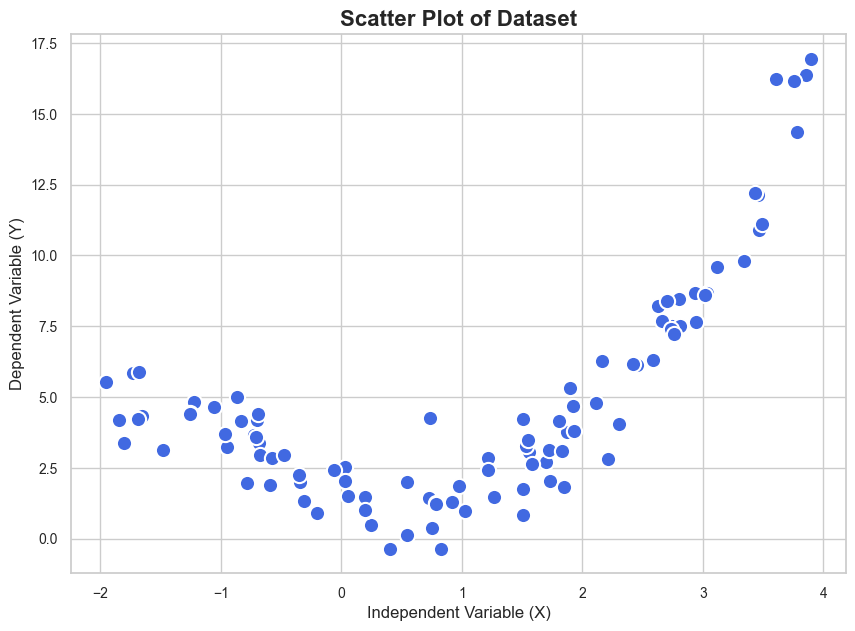

In [37]:
plt.figure(figsize=(10, 7))  # Slightly larger figure
sns.set(style="whitegrid")  # Add a grid for better readability
sns.scatterplot(x=df.X, y=df.Y, s=120, color='royalblue', edgecolor='w', linewidth=1.5)
plt.title('Scatter Plot of Dataset', fontsize=16, fontweight='bold')  # Add a title
plt.xlabel('Independent Variable (X)', fontsize=12)
plt.ylabel('Dependent Variable (Y)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Model

In [38]:
def poly_transform(df,degree):
    poly_x=np.insert(df,0,1,axis=1)

    for i in range(2,degree+1):
        x=df**i
        poly_x=np.concatenate((poly_x,x),axis=1)
    
    return poly_x

## Create a random test data for model testing

In [39]:
x_test=np.linspace(-3,3,100).reshape(100,1)
x_test_poly=poly_transform(x_test,3)

poly_x = poly_transform(x, 3)
intercept_nd_coef = np.linalg.inv(np.dot(poly_x.T, poly_x)).dot(poly_x.T).dot(y)
predicted_y = np.dot(x_test_poly,intercept_nd_coef)

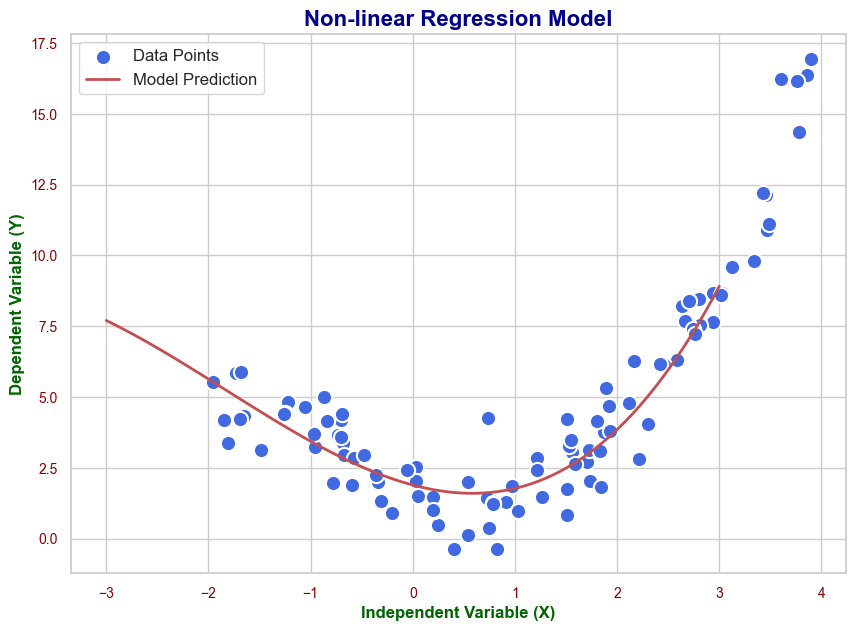

In [40]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

sns.scatterplot(x=df.X, y=df.Y, s=120, color='royalblue', edgecolor='w', linewidth=1.5, label='Data Points')

plt.plot(x_test, predicted_y, 'r-', linewidth=2, label='Model Prediction')

plt.title('Non-linear Regression Model', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Independent Variable (X)', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Dependent Variable (Y)', fontsize=12, fontweight='bold', color='darkgreen')

plt.legend(fontsize=12)

plt.xticks(fontsize=10, color='darkred')
plt.yticks(fontsize=10, color='darkred')
plt.show()

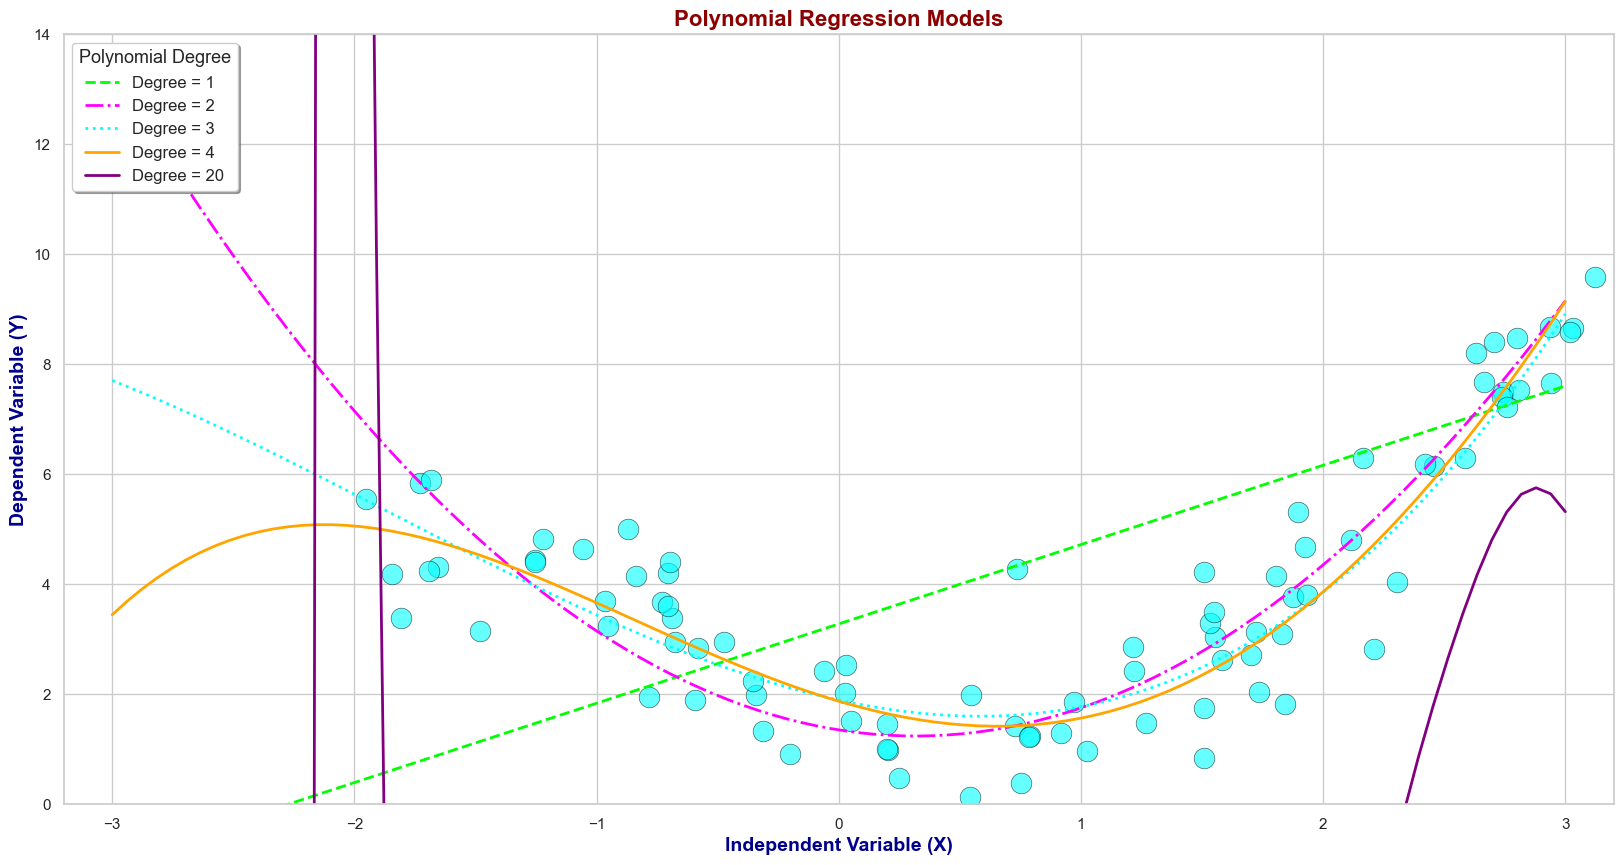

In [41]:
# Polynomial with degree 1
deg1 = poly_transform(x, 1)
parameters_deg1 = np.linalg.inv(np.dot(deg1.T, deg1)).dot(deg1.T).dot(y)
x_test = np.linspace(-3, 3, 100).reshape(100, 1)
x_test_deg1 = poly_transform(x_test, 1)
deg1_y = np.dot(x_test_deg1,parameters_deg1)

# Polynomial with degree 2
deg2 = poly_transform(x, 2)
parameters_deg2 = np.linalg.inv(np.dot(deg2.T, deg2)).dot(deg2.T).dot(y)
x_test = np.linspace(-3, 3, 100).reshape(100, 1)
x_test_deg2 = poly_transform(x_test, 2)
deg2_y = np.dot(x_test_deg2,parameters_deg2)

# Polynomial with degree 3
deg3 = poly_transform(x, 3)
parameters_deg3 = np.linalg.inv(np.dot(deg3.T, deg3)).dot(deg3.T).dot(y)
x_test = np.linspace(-3, 3, 100).reshape(100, 1)
x_test_deg3 = poly_transform(x_test, 3)
deg3_y = np.dot(x_test_deg3,parameters_deg3)

# Polynomial with degree 4
deg4 = poly_transform(x, 4)
parameters_deg4 = np.linalg.inv(np.dot(deg4.T, deg4)).dot(deg4.T).dot(y)
x_test = np.linspace(-3, 3, 100).reshape(100, 1)
x_test_deg4 = poly_transform(x_test, 4)
deg4_y = np.dot(x_test_deg4,parameters_deg4)

# Polynomial with degree 20
deg20 = poly_transform(x, 20)
parameters_deg20 = np.linalg.inv(np.dot(deg20.T, deg20)).dot(deg20.T).dot(y)
x_test = np.linspace(-3, 3, 100).reshape(100, 1)
x_test_deg20 = poly_transform(x_test, 20)
deg20_y = np.dot(x_test_deg20,parameters_deg20)



plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.scatterplot(x=df.X, y=df.Y, s=220, color='cyan', alpha=0.6, edgecolor='black', linewidth=0.5)
plt.xlabel('Independent Variable (X)', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Dependent Variable (Y)', fontsize=14, fontweight='bold', color='darkblue')

plt.plot(x_test, deg1_y, 'lime', linewidth=2, linestyle='--', label='Degree = 1')
plt.plot(x_test, deg2_y, 'magenta', linewidth=2, linestyle='-.', label='Degree = 2')
plt.plot(x_test, deg3_y, 'cyan', linewidth=2, linestyle=':', label='Degree = 3')
plt.plot(x_test, deg4_y, 'orange', linewidth=2, linestyle='-', label='Degree = 4')
plt.plot(x_test, deg20_y, 'purple', linewidth=2, linestyle='-', label='Degree = 20')

plt.legend(shadow=True, fontsize=12, loc='upper left', title='Polynomial Degree', title_fontsize='13')
plt.xlim(-3.2, 3.2)
plt.ylim(0, 14)
plt.title('Polynomial Regression Models', fontsize=16, fontweight='bold', color='darkred')
plt.show()